# Imports

In [0]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, normalize
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV,KFold
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,fbeta_score

In [2]:
uploaded = files.upload()

Saving dopo_eda.csv to dopo_eda (1).csv


In [3]:
df = pd.read_csv("/content/dopo_eda.csv")
df.head()

,Unnamed: 0,text,label
0,0,econom recoveri nation climat pledg must desig...,0.0
1,1,difficult time it’ hard connect natur world ea...,0.0
2,2,decis postpon cop unavoid collect prioriti mus...,0.0
3,3,japan world’ fifth largest emitt greenhous gas...,0.0
4,4,countri includ naturebasedsolut climat plan nd...,0.0


In [4]:
df.drop("Unnamed: 0", axis = 1,inplace = True)
df.head()

,text,label
0,econom recoveri nation climat pledg must desig...,0.0
1,difficult time it’ hard connect natur world ea...,0.0
2,decis postpon cop unavoid collect prioriti mus...,0.0
3,japan world’ fifth largest emitt greenhous gas...,0.0
4,countri includ naturebasedsolut climat plan nd...,0.0


In [5]:
for i in range(len(df)):
    if df.label[i] != df.label[i]:
        print(df.loc[i])
        df.drop(i, inplace = True)

text     billion upon billion hard earn tax dollar spen...
label                                                  NaN
Name: 18007, dtype: object


# TF-IDF Transform

In [6]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
test_size_range = [0.25, 0.30]
cv_range = [5, 10, 15, 20]
for i in range(2):
    for j in range(3):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        
        param_grid = {
            'penalty': ['l1'],
            'C': [.001, .01, .1, 1, 10, 100, 1000],
            'solver': ['liblinear',"saga"],
            'multi_class': ['ovr']  
        }# Create a based model

        clf = LogisticRegression()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))   

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 10.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


 For test size =  0.25  and number of folds  5

The score: 0.9098

Test set score : 0.916

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1799
         1.0       0.93      0.93      0.93      2703

    accuracy                           0.92      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 25.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


 For test size =  0.25  and number of folds  10

The score: 0.9131

Test set score : 0.912

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1878
         1.0       0.92      0.92      0.92      2624

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 15 folds for each of 14 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 40.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


 For test size =  0.25  and number of folds  15

The score: 0.911

Test set score : 0.921

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1848
         1.0       0.93      0.94      0.93      2654

    accuracy                           0.92      4502
   macro avg       0.92      0.92      0.92      4502
weighted avg       0.92      0.92      0.92      4502


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  9.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


 For test size =  0.3  and number of folds  5

The score: 0.9124

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2252
         1.0       0.92      0.93      0.92      3151

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 22.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


 For test size =  0.3  and number of folds  10

The score: 0.9101

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2249
         1.0       0.93      0.93      0.93      3154

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 15 folds for each of 14 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 35.9min finished


 For test size =  0.3  and number of folds  15

The score: 0.9098

Test set score : 0.919

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2221
         1.0       0.93      0.93      0.93      3182

    accuracy                           0.92      5403
   macro avg       0.92      0.92      0.92      5403
weighted avg       0.92      0.92      0.92      5403




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


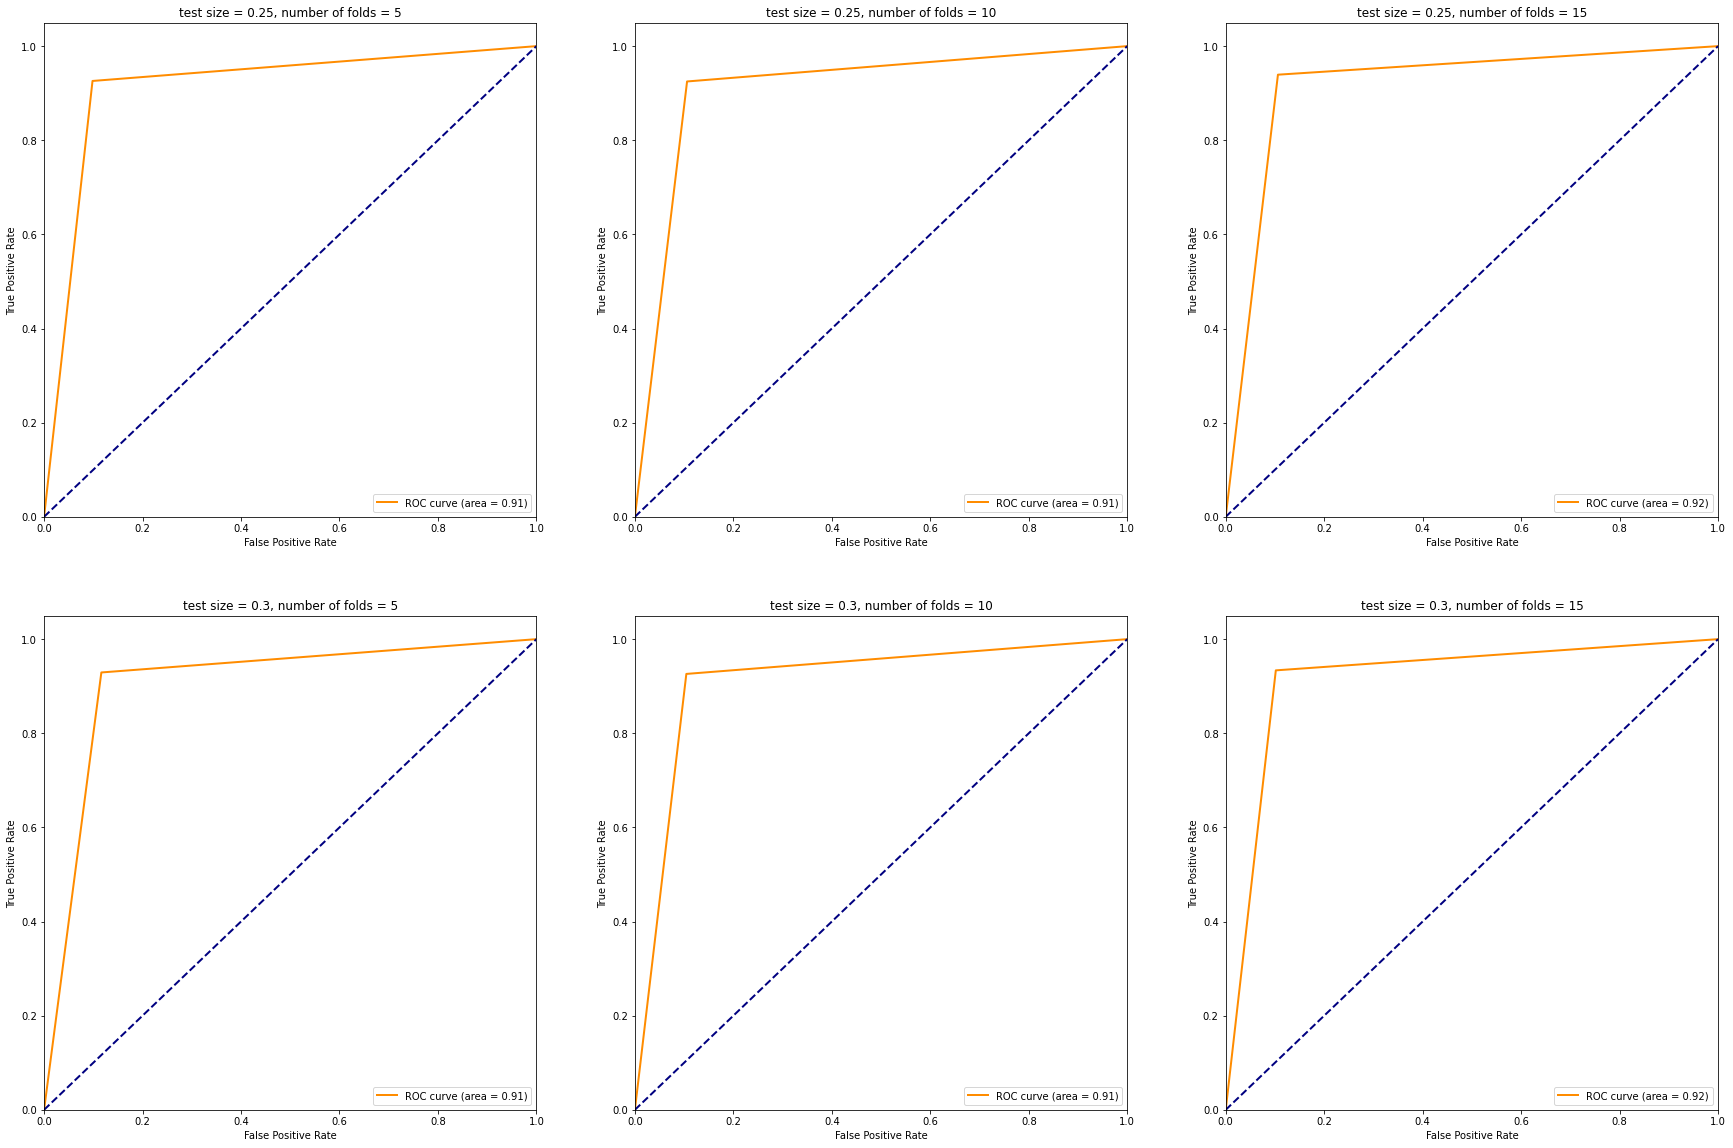

In [10]:
f, axes = plt.subplots(2,3,figsize=(30,20))
for i in range(2):
    for j in range(3):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()